<a href="https://colab.research.google.com/github/juandavidarcila/Metodos-Computacionales/blob/main/Semana4/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
X = np.array([0,9.8,30])
Y = np.array([0,2.3,2.2])

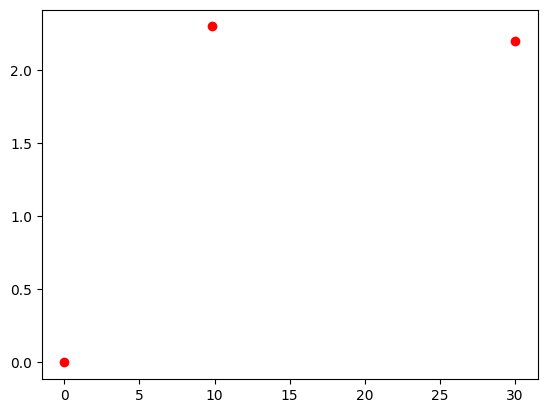

In [ ]:
plt.scatter(X,Y,color='r')

In [ ]:
# Programas la base
def Lagrange(x,X,i):

  L = 1 # Productoria
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

In [ ]:
# Definir un simbolo
x = sym.Symbol("x", real=True)
x**2

x**2

In [ ]:
Lagrange(x,X,0)

(1.0 - 0.102040816326531*x)*(1.0 - 0.0333333333333333*x)

In [ ]:
L0 = Lagrange(x,X,1).simplify()
L0

x*(0.15154576682158 - 0.00505152556071934*x)

In [ ]:
def Interpolate(x,X,Y):

  Poly = 0

  for i in range(len(Y)):
    Poly += Y[i] * Lagrange(x,X,i)
  return Poly

In [ ]:
p1 = Interpolate(x,X,Y).simplify()
p1

x*(0.312977705933859 - 0.00798814575335084*x)

In [ ]:
x1 = np.linspace(X[0],X[-1],3000)
y1 = Interpolate(x1,X,Y)

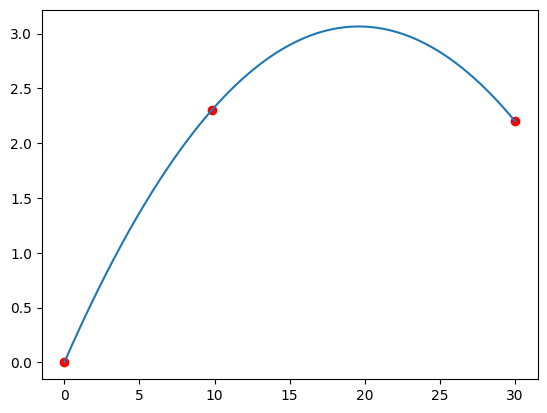

In [ ]:
plt.plot(x1,y1)
plt.scatter(X,Y,color='r')

In [ ]:
p1 = sym.Poly(p1)
todos = p1.all_coeffs()

In [ ]:
x = sym.Symbol("x", real=True)
theta = sym.Symbol("theta",real=True)
v0 = sym.Symbol("v0",real=True)

In [ ]:
# -*- coding: utf-8 -*-
"""Actividad8.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1JQtcYuYtQ8aRwSKnhX2wCCraUopbU532
"""

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

X = np.array([0, 9.8, 30])
Y = np.array([0, 2.3, 2.2])

plt.scatter(X,Y,color='r')

def Lagrange(x,X,i):
  L = 1 # Productoria
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j]) #Base cardina (L_i)
  return L

def Interpolate(x,X,Y):
  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

x1 = np.linspace(X[0], X[-1], 100)
y1 = Interpolate(x1, X, Y)

plt.plot(x1, y1); plt.plot(X, Y, 'o',color='red')

"""### Interpolación y extracción de coeficientes"""

x = sp.Symbol('x')
theta, v0 = sp.symbols('theta v_0')

p1 = Interpolate(x, X, Y).simplify() #Polinomio
p1 = sp.Poly(p1)

coefs = p1.all_coeffs()
coefs

"""### Ángulo y rapidez inicial"""

a = sp.tan(theta) - coefs[1]
b = - 1/2*9.81*(1/(v0*sp.cos(theta)))**2 - coefs[0]

sln = sp.solve([a,b], [theta, v0])[1]

ang0 = np.rad2deg(float(sln[0]))

print('Ángulo inicial: ', ang0)
print('Velocidad inicial: ', float(sln[1]))

"""### Derivación simbólica"""

p1 = Interpolate(x, X, Y).simplify() #Polinomio

der1 = sp.diff(p1, x); display(der1)
der2 = sp.diff(der1, x); display(der2)

der1_fun = sp.lambdify(x, der1, 'numpy')
der2_fun = sp.lambdify(x, der2, 'numpy')

x0 = 2
error = 10
while error > 1e-5:
  x1 = x0 - der1_fun(x0)/der2_fun(x0)
  error = np.abs(x1-x0)
  x0 = x1

print('Coordenada en x donde ocurre la altura max: ', x0)
print('Coordenada en y donde ocurre la altura max: ', Interpolate(x0, X, Y))

"""### Tiempo de vuelo"""

t = sp.Symbol('t')
d = p1.subs({x: float(sln[1])*ang0*t})

sp.solve(d - 2.2, t) #Sospechoso pero lo intenté :)